# Entendendo o problema e definindo o nosso Objetivo

### __Objetivo__
Maximizar o lucro do hotel através de recomendações práticas baseadas na análise de dados.

### __perguntas-chaves__
- Quais fatores afetam as reservas e cancelamentos?

- Como otimizar a ocupação do hotel?

- Existem padrões sazonais importantes a serem considerados?


## Extraindo o conjunto de dados do Kaggle





In [ ]:
import kagglehub

# carregando o dataset

path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/jessemostipak/hotel-booking-demand/versions/1


In [ ]:
import pandas as pd
import os

file_path = os.path.join(path, 'hotel_bookings.csv')

Hotel_df = pd.read_csv(file_path)

# uma visão inicial dos dados
Hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Análise Exploratória dos Dados (EDA)

In [ ]:
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Análise das datas de visitas dos clientes

In [ ]:
Hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Tratando o conjunto de Dados


In [ ]:
# verificando a quantidade de valores null
print(Hotel_df.isnull().sum())

# precisamos entender e nos perguntar sobre o que fazer com os valores null
# se os removemos ou os mantemos, se esses valores existerem no dataset é
# algo normal, se sim, avaliaremos se será melhor para a análise manter ou
# remover esses dados

Hotel_df.dropna(subset=['country'], inplace=True)

Hotel_df.fillna(0, inplace = True)

# Removendo valores duplicados, clientes repetidos em datas diferentes continuarão
Hotel_df = Hotel_df.drop_duplicates()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
print(Hotel_df['agent'].head())

2      0.0
3    304.0
4    240.0
6      0.0
7    303.0
Name: agent, dtype: float64


<ipython-input-118-505f39a93cda>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Hotel_df, x='arrival_date_month', order=meses, palette=cores)


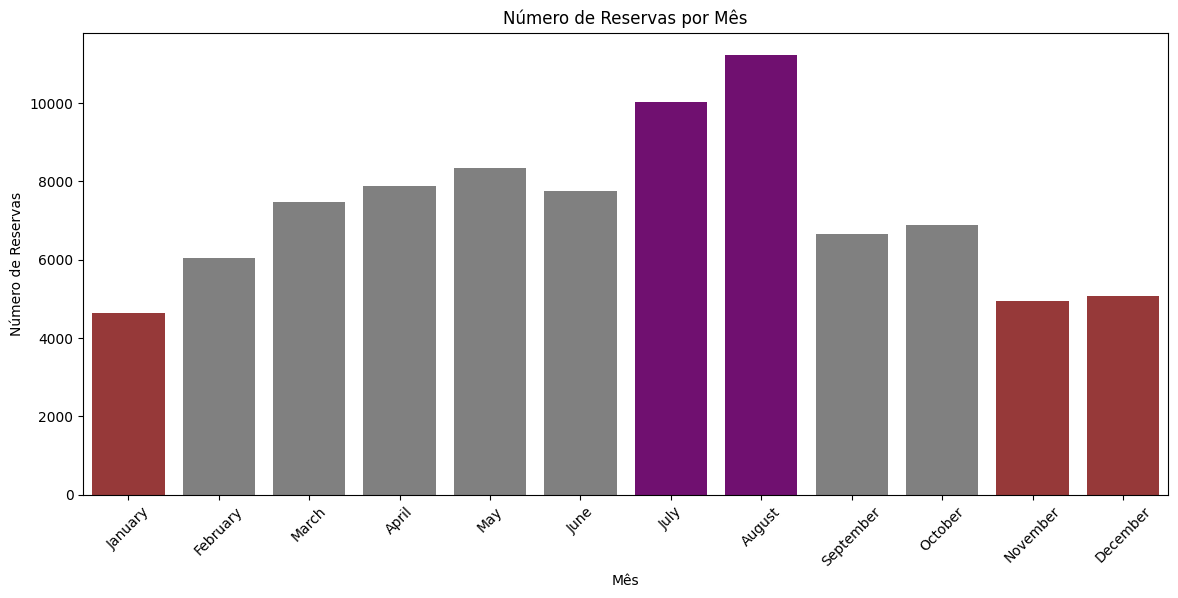

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertendo a coluna de datas
Hotel_df['arrival_date'] = pd.to_datetime(Hotel_df['arrival_date_year'].astype(str) + '-' +
                                    Hotel_df['arrival_date_month'].astype(str) + '-1')


# criando listas de meses
meses = ['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']

# listas de cores para visualisar melhor as colunas
cores = []

# meio brute force, mas ok
for i in range(12):
  if i == 0 or i == 10 or i == 11:
    cores.append('brown')
  elif i == 6 or i == 7:
    cores.append('purple')
  else:
    cores.append('gray')

# Gráfico de reservas por mês
plt.figure(figsize=(14, 6))
sns.countplot(data=Hotel_df, x='arrival_date_month', order=meses, palette=cores)
plt.title('Número de Reservas por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)
plt.show()

## __interpretanto as datas de reserva__

### __alta temporada__
notamos então, que durante os meses de Julho e Agosto, há um pico de visitas dos clientes, que pode ser influênciado pelo verão, quando as pessoas normalmente priorizam pelas férias.

### __baixa temporada__
é percepitível pelo gráfico que no período de fim de ano, Novembro, Dezembro e Janeiro, há uma baixa na demanda de reservas por parte clientes.

## __verificando os cancelamentos por mês__

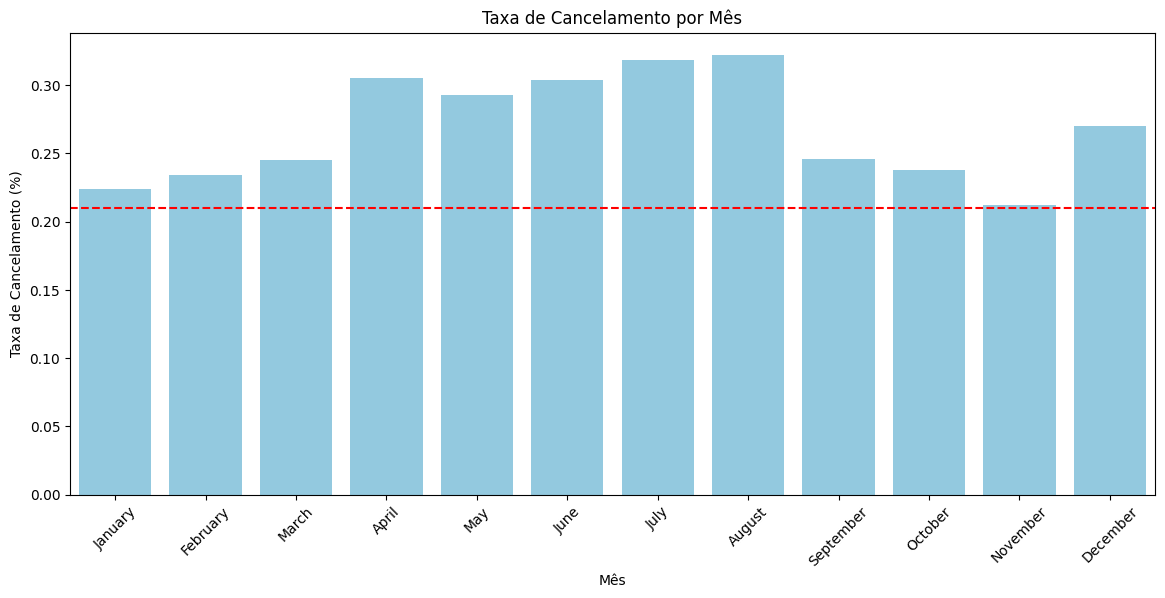

In [ ]:
# Criando uma coluna de taxa de cancelamento
Hotel_df['canceled'] = Hotel_df['is_canceled'].astype(int)

# Agrupando por mês para obter a taxa de cancelamento
cancelamentos_por_mes = Hotel_df.groupby('arrival_date_month')['canceled'].mean().reindex(meses)

# Plotando o gráfico
plt.figure(figsize=(14, 6))
sns.barplot(x=cancelamentos_por_mes.index, y=cancelamentos_por_mes.values, color="skyblue")
plt.axhline(y=0.21, color='r', linestyle='--')
plt.title('Taxa de Cancelamento por Mês')
plt.xlabel('Mês')
plt.ylabel('Taxa de Cancelamento (%)')
plt.xticks(rotation=45)
plt.show()

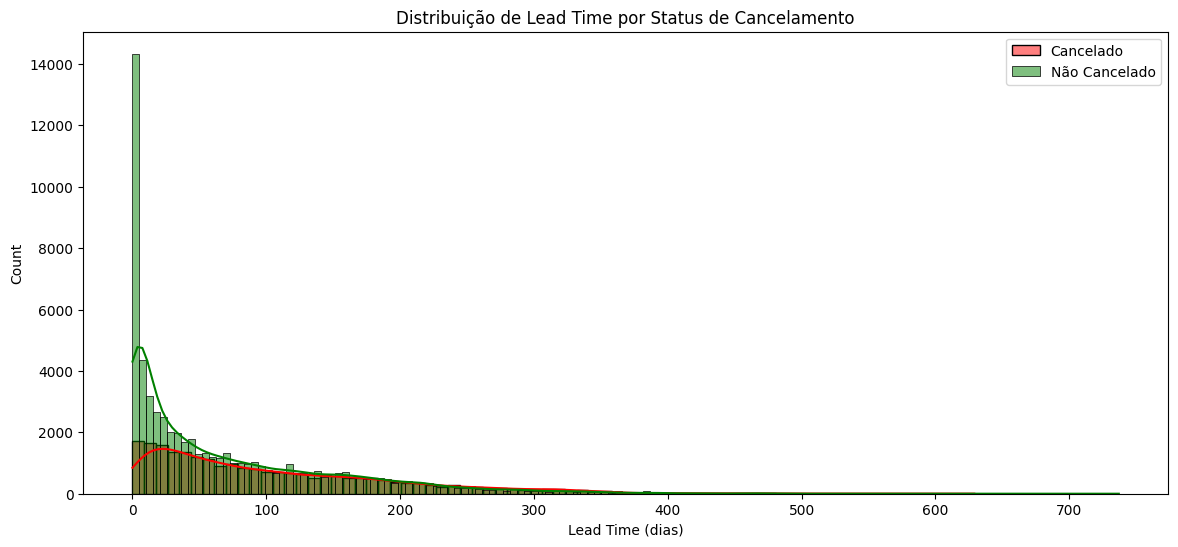

<ipython-input-120-fe634c89d3fa>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Hotel_df_filtered, x='market_segment', y='is_canceled',


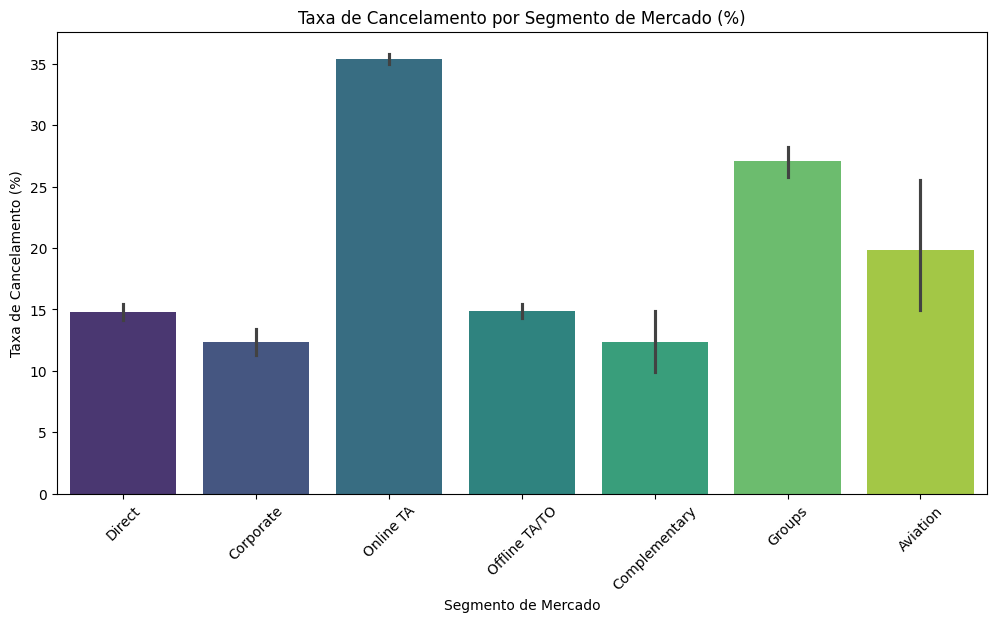

In [ ]:
# Gráfico para analisar a relação entre 'lead_time' e cancelamentos
plt.figure(figsize=(14, 6))
sns.histplot(data=Hotel_df[Hotel_df['is_canceled'] == 1], x='lead_time', kde=True, color='red', label='Cancelado')
sns.histplot(data=Hotel_df[Hotel_df['is_canceled'] == 0], x='lead_time', kde=True, color='green', label='Não Cancelado')
plt.title('Distribuição de Lead Time por Status de Cancelamento')
plt.xlabel('Lead Time (dias)')
plt.legend()
plt.show()


# precisamos remover da plotagem, mas não do dataset, dados com a coluna market_segment com valor "Undefined"
# Filtrando os dados para excluir os valores "undefined" na coluna 'market_segment'
Hotel_df_filtered = Hotel_df[Hotel_df['market_segment'] != 'Undefined']

# Gerar o gráfico de barras sem o segmento "undefined"
plt.figure(figsize=(12, 6))
sns.barplot(data=Hotel_df_filtered, x='market_segment', y='is_canceled',
            estimator=lambda x: x.mean() * 100, palette='viridis')

# Ajustar os rótulos e título do gráfico
plt.title('Taxa de Cancelamento por Segmento de Mercado (%)')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Taxa de Cancelamento (%)')
plt.xticks(rotation=45)
plt.show()


## __analisando os cancelamentos mensais__

notamos que há uma alta taxa de cancalemento em cada mês, o gráfico nos permite observar que em todos os meses há, pelo menos, o cancelamento de 21% das reservas

## __meses com mais cancelamento__

notadamente nos meses observados como baixa temporada, há uma taxa de cancelamento menor, acreditamos que, para garantir uma reserva na alta temporada, os clientes fazem a reserva com muita antecedência e por isso podem acabar cancelando, por imprevistos ao longo do ano.

## __recomendações__

- __Política de Depósito Antecipado:__ Introduzir depósitos parciais ou taxas de cancelamento para reservas feitas com longos lead_time.

- __Promoções em reservas de última hora:__ Oferecer descontos para reservas feitas com um prazo curto, maximizando a ocupação de quartos que poderiam ficar vazios.

## Análise de fidelização de hóspedes

<ipython-input-121-bd9043e11d9e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=Hotel_df, x='is_repeated_guest', y='is_canceled', estimator=lambda x: x.mean() * 100, palette='coolwarm')
<ipython-input-121-bd9043e11d9e>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


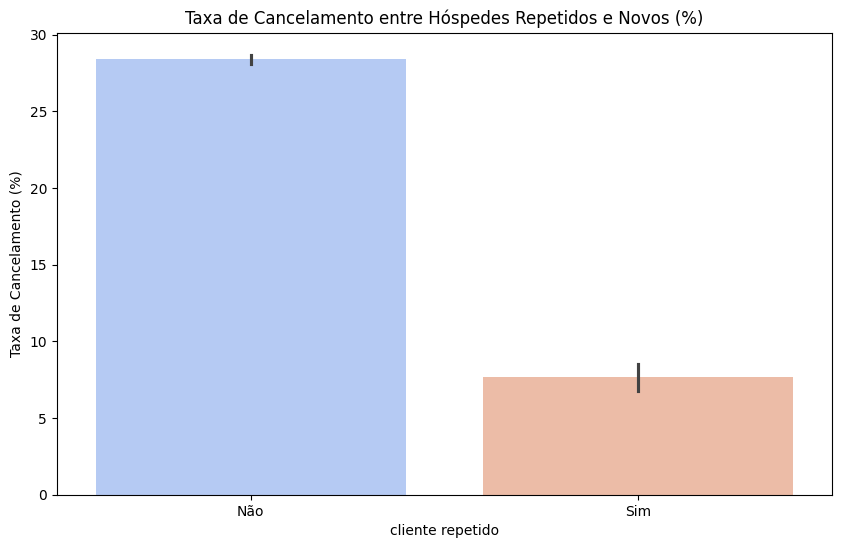

In [ ]:
# Gráfico para analisar hóspedes repetidos e a taxa de cancelamento
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=Hotel_df, x='is_repeated_guest', y='is_canceled', estimator=lambda x: x.mean() * 100, palette='coolwarm')

ax.set_xticklabels(['Não', 'Sim'])

plt.title('Taxa de Cancelamento entre Hóspedes Repetidos e Novos (%)')
plt.xlabel('cliente repetido')
plt.ylabel('Taxa de Cancelamento (%)')
plt.show()

## verificação da fidelização de clientes

é notável a diferença da taxa de cancelamento entre clientes que já visitaram anteriormente o hotel daqueles que estão visitando uma primeira vez, o que indica que uma estratégia interessante é investir na fidelização dos clientes, pois essses, depois de fidelizados, costumam cancelar as reservas em uma taxa menor.

## __Recomendação__

Implementar um programa de fidelidade com recompensas como upgrades de quarto e descontos em estadias futuras para incentivar os hóspedes a voltarem.

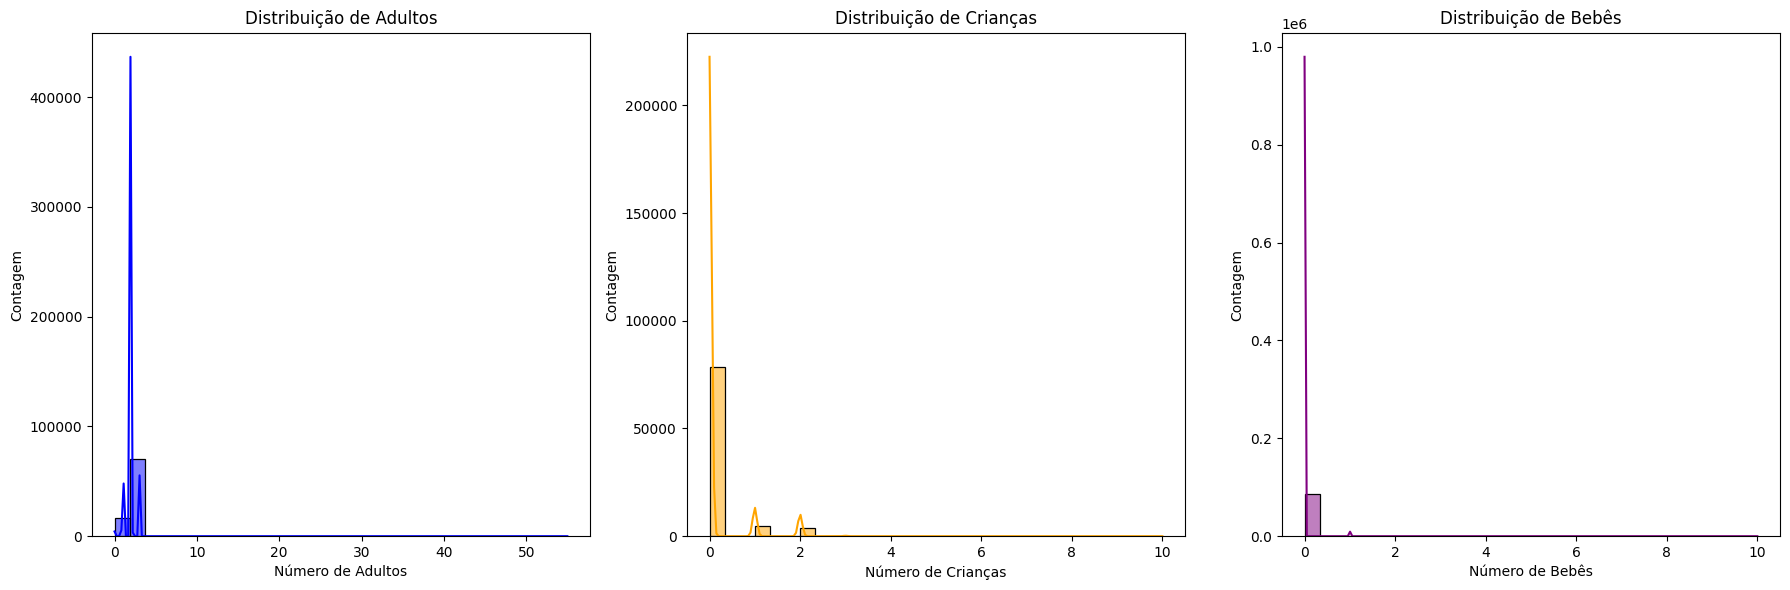

In [ ]:
# Ajustando a figura para exibir 3 gráficos lado a lado
plt.figure(figsize=(18, 6))

# Gráfico 1: Distribuição de Adultos
plt.subplot(1, 3, 1)  # 1 linha, 3 colunas, gráfico 1
sns.histplot(Hotel_df['adults'], kde=True, color='blue', label='Adultos', bins=30)
plt.title('Distribuição de Adultos')
plt.xlabel('Número de Adultos')
plt.ylabel('Contagem')

# Gráfico 2: Distribuição de Crianças
plt.subplot(1, 3, 2)  # 1 linha, 3 colunas, gráfico 2
sns.histplot(Hotel_df['children'], kde=True, color='orange', label='Crianças', bins=30)
plt.title('Distribuição de Crianças')
plt.xlabel('Número de Crianças')
plt.ylabel('Contagem')

# Gráfico 3: Distribuição de Bebês
plt.subplot(1, 3, 3)  # 1 linha, 3 colunas, gráfico 3
sns.histplot(Hotel_df['babies'], kde=True, color='purple', label='Bebês', bins=30)
plt.title('Distribuição de Bebês')
plt.xlabel('Número de Bebês')
plt.ylabel('Contagem')

# Ajustando o layout para garantir que os gráficos não se sobreponham
plt.tight_layout()

# Exibindo os gráficos
plt.show()

In [ ]:
# notamos também que, daqui para frente, as seguintes colunas não serão mais utilizadas

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

Hotel_df.drop(useless_col, axis = 1, inplace = True)

In [ ]:
  # criando dataframes númericos e categóricos

cat_cols = [col for col in Hotel_df.columns if Hotel_df[col].dtype == 'O']
cat_df = Hotel_df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03
5,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03
6,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-03


In [ ]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day
cat_df = cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1)
cat_df.head()



<ipython-input-80-285e7d66e197>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
<ipython-input-80-285e7d66e197>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['year'] = cat_df['reservation_status_date'].dt.year
<ipython-input-80-285e7d66e197>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3
5,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3
6,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,3


In [ ]:
# encoding categorical variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})


In [ ]:
cat_df.head()



,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
2,0,0,0,0,1.0,0,0,0,7,2
3,0,0,1,1,1.0,0,0,0,7,2
4,0,0,2,2,1.0,0,0,0,7,3
5,0,0,2,2,1.0,0,0,0,7,3
6,0,0,0,0,0.0,0,0,0,7,3


In [ ]:
num_df = Hotel_df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df.drop('canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1
5,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1
6,0,27,1,0,2,2,0.0,0,0,0,0,0.0,0.0,107.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0


In [ ]:
num_df.var()

,0
lead_time,7140.174742
arrival_date_week_number,187.178996
arrival_date_day_of_month,77.442949
stays_in_weekend_nights,0.987734
stays_in_week_nights,3.640676
adults,0.257236
children,0.165039
babies,0.009851
is_repeated_guest,0.032256
previous_cancellations,0.743736


In [ ]:
import numpy as np

# normalizando váriaveis numericas

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
num_df.var()

,0
lead_time,2.459427
arrival_date_week_number,0.448274
arrival_date_day_of_month,0.507467
stays_in_weekend_nights,0.987734
stays_in_week_nights,3.640676
adults,0.257236
children,0.165039
babies,0.009851
is_repeated_guest,0.032256
previous_cancellations,0.743736


In [ ]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0.000000,0.0,4.330733,0,0
3,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.720312,0.0,4.330733,0,0
4,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.484797,0.0,4.595120,0,1
5,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.484797,0.0,4.595120,0,1
6,0.000000,3.332205,0.693147,0,2,2,0.0,0,0,0,0,0.000000,0.0,4.682131,0,0


# Algumas Considerações

Legal, durante a análise exploratória, respondemos **QUANDO** alguém está mais propenso a cancelar, mas **QUEM** está mais sujeito a cancelar?

uma Árvore de Decisão pode facilitar esse processo explicativo.

# MACHINE LEARNING

Acurácia: 0.9482376904002834
Matriz de Confusão:
[[13926   583]
 [  586  7489]]
Pontuações em cada fold: [0.94823769 0.94770634 0.95337201 0.9505823  0.94796971]
Pontuação média: 0.9495736089622178


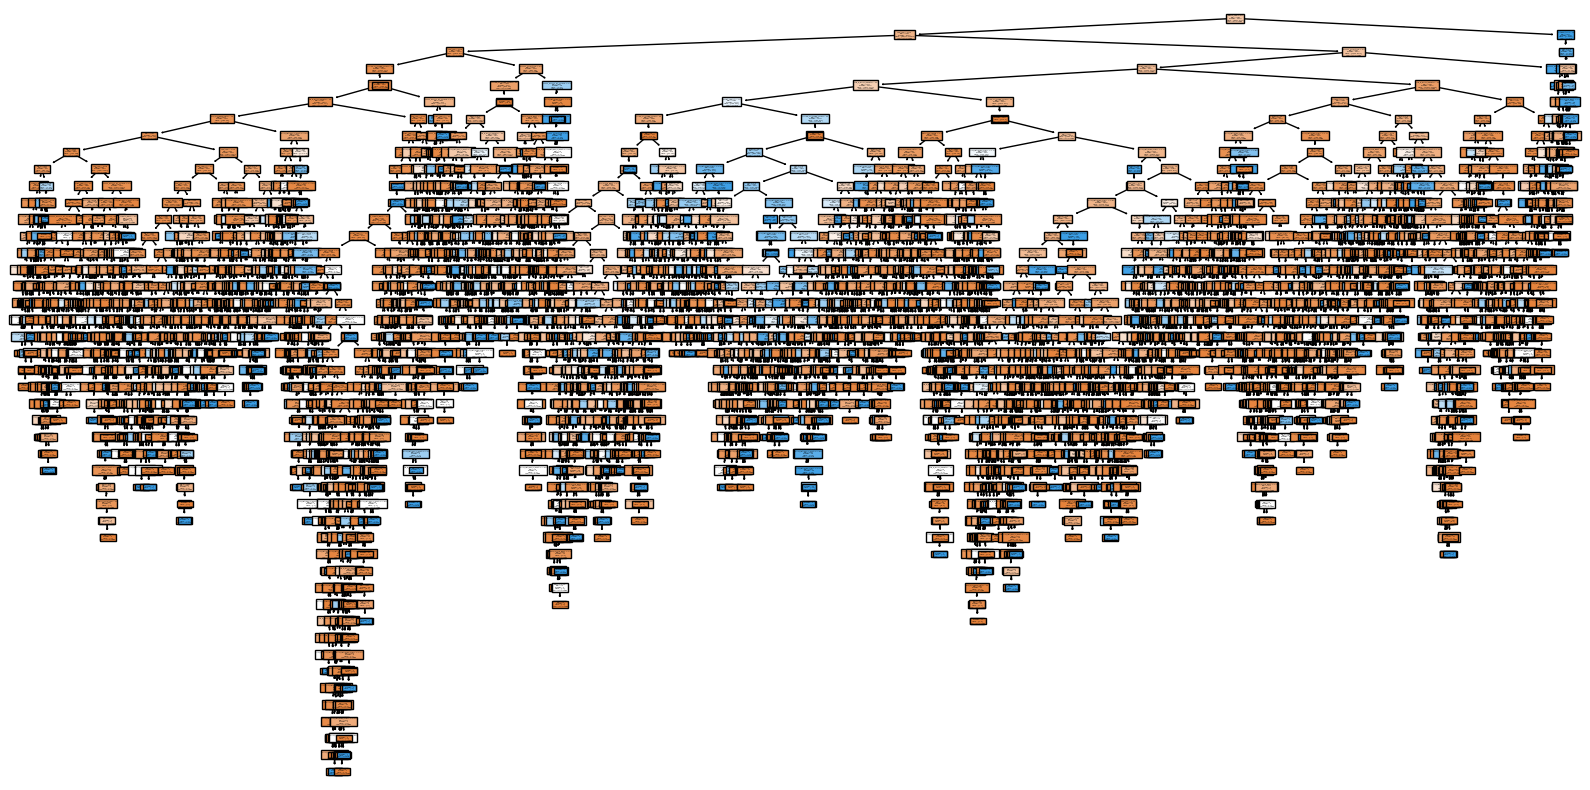

In [ ]:
#Implementando a Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd


X = pd.concat([cat_df, num_df], axis = 1)
y = Hotel_df['is_canceled']

singleTree_model = DecisionTreeClassifier(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

singleTree_model.fit(x_train, y_train)
y_pred = singleTree_model.predict(x_test)

#acurácia simples

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

#matriz de confusão

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

#realizando a validação cruzada

# Configurar o k-fold com 5 divisões (5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar a validação cruzada e calcular a média das pontuações
scores = cross_val_score(singleTree_model, X, y, cv=kf)

print("Pontuações em cada fold:", scores)
print("Pontuação média:", scores.mean())

#visualizando a arvore

plt.figure(figsize=(20, 10))
plot_tree(singleTree_model, filled=True, feature_names=X.columns, class_names=['Not Canceled', 'Canceled'])
plt.show()


Conseguimos uma incrìvel acurácia de 95% nesse problema de classificação, agora se uma árvore já foi boa, imagine várias! Vamos testar o Random Forest.

In [ ]:
#implementando o random forest

from sklearn.ensemble import RandomForestClassifier


X = pd.concat([cat_df, num_df], axis = 1)
y = Hotel_df['is_canceled']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest_model = RandomForestClassifier(random_state=42, n_estimators=300, bootstrap=False) #manual tunning, (grid_search demorou muito), em média, 200, 300 e 500 estimadores ficaram empatados
forest_model.fit(x_train, y_train)
y_pred = forest_model.predict(x_test)

#acurácia simples

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

#cross validation

scores = cross_val_score(forest_model, X, y, cv=kf)

print("Pontuações em cada fold:", scores)
print("Pontuação média:", scores.mean())

Acurácia: 0.9592952356923594
Pontuações em cada fold: [0.95929524 0.95820193 0.96126997 0.95933558 0.96068124]
Pontuação média: 0.9597567914452346


Como podemos ver, houve sim um singelo aumento na acurácia média passando a 95.97%. Em uma aplicação real num hotel com milhares de visitas, esses 0.97% a mais são muita coisa. Mas e se fizermos um tuning?


In [ ]:
from sklearn.experimental import enable_halving_search_cv  # Necessário para habilitar o HalvingGridSearchCV
from sklearn.model_selection import HalvingGridSearchCV


# Definir os parâmetros para o grid search
param_grid = {
    'n_estimators': [200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [False]
}


halving_Grid = HalvingGridSearchCV(forest_model, param_grid, cv=5, factor=2, verbose=1, n_jobs=1)
halving_Grid.fit(X, y)

# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(halving_Grid.best_params_)



n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 1857
max_resources_: 118902
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 72
n_resources: 1857
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 36
n_resources: 3714
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 2
n_candidates: 18
n_resources: 7428
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 3
n_candidates: 9
n_resources: 14856
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


----------
iter: 4
n_candidates: 5
n_resources: 29712
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 5
n_candidates: 3
n_resources: 59424
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


----------
iter: 6
n_candidates: 2
n_resources: 118848
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhores parâmetros encontrados:
{'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Aqui testamos primeiro o método Grid Search, mas mostrou-se MUUUITO custuso pro aparato disponível no colab, o que fez que optassemos pelo halving, que elimina combinações menos promissoras a medida que testa, além de diminuirmos o tamanho do grid.

In [ ]:
#Agora que encontramos os melhores hiperparamentros vamos testá-los

forest_model= RandomForestClassifier(random_state=42, max_depth=10, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=200, bootstrap=False)
forest_model.fit(x_train, y_train)
y_pred = forest_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.8431100458349102


vemos que o halving tunninng mostrou-se nada eficiente se comparado ao manual que fizemos anteriormente, manteremos essa etapa apenas para fins de registro.

#Cat Boost

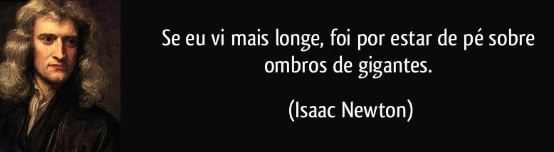

Antes de começar um trabalho ou pesquisa, é uma boa prática é olhar ao redor se atentando ao estado da arte e pesquisas anteriores, para fins tanto de base quanto de aprimoramento. Isto posto, a nossa escolha de algoritmo se deve a essa pesquisa. Observamos que, para a natureza do nosso problema, o **Cat Boost** seria a melhor escolha.

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = pd.concat([cat_df, num_df], axis = 1)
y = Hotel_df['is_canceled']
X.shape, y.shape


((119390, 26), (119390,))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.5
0:	learn: 0.4779536	total: 75ms	remaining: 7.42s
1:	learn: 0.4105668	total: 103ms	remaining: 5.06s
2:	learn: 0.3908203	total: 130ms	remaining: 4.19s
3:	learn: 0.3573344	total: 155ms	remaining: 3.71s
4:	learn: 0.3265187	total: 183ms	remaining: 3.48s
5:	learn: 0.2702047	total: 211ms	remaining: 3.31s
6:	learn: 0.2387687	total: 237ms	remaining: 3.15s
7:	learn: 0.2170429	total: 263ms	remaining: 3.03s
8:	learn: 0.2061730	total: 289ms	remaining: 2.92s
9:	learn: 0.1899357	total: 317ms	remaining: 2.85s
10:	learn: 0.1670895	total: 346ms	remaining: 2.8s
11:	learn: 0.1603679	total: 373ms	remaining: 2.74s
12:	learn: 0.1547992	total: 405ms	remaining: 2.71s
13:	learn: 0.1473948	total: 433ms	remaining: 2.66s
14:	learn: 0.1369439	total: 458ms	remaining: 2.6s
15:	learn: 0.1291769	total: 490ms	remaining: 2.57s
16:	learn: 0.1220696	total: 520ms	remaining: 2.54s
17:	learn: 0.1115068	total: 547ms	remaining: 2.49s
18:	learn: 0.1100256	total: 570ms	remaining: 2.43s
19:	learn: 0.108702

In [ ]:
print(f"Accuracy Score of Cat Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Cat Boost Classifier is : 0.9941704636826588
Confusion Matrix : 
[[18829    12]
 [  162 10845]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18841
           1       1.00      0.99      0.99     11007

    accuracy                           0.99     29848
   macro avg       1.00      0.99      0.99     29848
weighted avg       0.99      0.99      0.99     29848



Nosso modelo conta com uma surpreendente acúracia de 99.4%, determinando assim com exímia precisão a variável 'is_canceled'.